<a href="https://colab.research.google.com/github/aqwvinh/Basic_guideline_for_Machine_Learning/blob/master/HW3_Nguyen_Vinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning II: Deep Learning and Applications
# Homework 3

**Due date: Apr 20**

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook [here](https://docs.google.com/forms/d/e/1FAIpQLSd3LoRVwJ1Nc8hogOv76Y6_JbfPTdRzxUNfaU1ZV9GVaIZDSA/viewform?usp=sf_link). Please **enable editing or comments** so that you can receive feedback from TAs.

Install GraphVite and PyTorch. This may take a while.




In [0]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local -f

!conda install -y -c milagraph -c conda-forge graphvite \
  python=3.6 cudatoolkit=10.0
!conda install -y wurlitzer ipykernel

import site
site.addsitedir("/usr/local/lib/python3.6/site-packages")
%reload_ext wurlitzer

--2020-04-20 14:13:02--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   171MB/s    in 0.5s    

2020-04-20 14:13:03 (171 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
  

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import torch
from torch import nn
import random
%matplotlib inline
import graphvite as gv
import graphvite.application as gap

## 1. Node embedding and visualization (50 points)

### 1) Node embedding

In this part, we will implement unsupervised node embeddings, and evaluate the learned embeddings on some downstream tasks.

Common packages for implementing node embeddings include
- GraphVite: [Website][GV], [Tutorial][GV Example], [Example config][GV Config]
- PyTorch BigGraph: [Website][PBG], [Document][PBG Example], [Example config][PBG Config]
- Open NE: [Website][ONE], [Tutorial][ONE Example]

[GV]: https://graphvite.io/
[PBG]: https://torchbiggraph.readthedocs.io/
[ONE]: https://github.com/thunlp/OpenNE
[GV Example]: https://colab.research.google.com/drive/1J5sXHlMejovbYD4sHfyKUmwiUI2a8YsD#forceEdit=true&sandboxMode=true
[PBG Example]: https://torchbiggraph.readthedocs.io/en/latest/configuration_file.html
[ONE Example]: https://github.com/thunlp/OpenNE#example
[GV Config]: https://graphvite.io/docs/latest/_downloads/8e1e8548e732f2b79c8698568dbcf185/quick_start.yaml
[PBG Config]: https://github.com/facebookresearch/PyTorch-BigGraph/blob/master/torchbiggraph/examples/configs/livejournal_config.py

The following scaffold is based on GraphVite. However, you can override it with any implementation.


We carry out the experiments on BlogCatalog dataset, where each node corresponds to a blog user and each edge corresponds to their friendship. Some node has labels which indicate the user's interests.

The dataset can be found in GraphVite.

The train file contains edge list of format `[head] [tail]`.

The test file contains node labels of format `[node] [label]`. Note one node may have multiple labels.

In [0]:
print(gv.dataset.blogcatalog.train)
print(gv.dataset.blogcatalog.label)

downloading https://www.dropbox.com/s/cf21ouuzd563cqx/BlogCatalog-dataset.zip?dl=1 to BlogCatalog-dataset.zip
extracting BlogCatalog-dataset/data/edges.csv from BlogCatalog-dataset.zip to edges.csv
converting edges.csv to blogcatalog_graph.txt
splitting graph blogcatalog_graph.txt into blogcatalog_train.txt, blogcatalog_valid.txt, blogcatalog_test.txt
/root/.graphvite/dataset/blogcatalog/blogcatalog_train.txt
extracting BlogCatalog-dataset/data/group-edges.csv from BlogCatalog-dataset.zip to group-edges.csv
converting group-edges.csv to blogcatalog_label.txt
/root/.graphvite/dataset/blogcatalog/blogcatalog_label.txt


Now train the node embeddings. For GraphVite, the following steps are needed.

- Create a GraphApplication instance
- Load the training file to the application
- Build the application
- Train the application with hyperparameters

Implement the missing steps in the following cell.

**Note:** Due to the implementation of GraphVite, `batch_size` should always be divisible by `augmentation_step`, otherwise Colab would crash.

In [0]:
# TODO: Implement the training and evaluation steps
app = gap.GraphApplication(dim=128)
app.load(file_name=gv.dataset.blogcatalog.train)
app.build(batch_size = 100000,
          num_negative = 2)
app.train(negative_weight = 2,
          augmentation_step = 5,
          )

app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.4,))

[time] GraphApplication.load: 0.126764 s


loading graph from /root/.graphvite/dataset/blogcatalog/blogcatalog_train.txt
0.00018755%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Graph<uint32>
------------------ Graph -------------------
#vertex: 10308, #edge: 327429
as undirected: yes, normalization: no
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


[time] GraphApplication.build: 9.28387 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
GraphSolver<128, float32, uint32>
----------------- Resource -----------------
#worker: 1, #sampler: 1, #partition: 1
tied weights: no, episode size: 200
gpu memory limit: 15.6 GiB
gpu memory cost: 53.4 MiB
----------------- Sampling -----------------
augmentation step: 5, shuffle base: 5
random walk length: 40
random walk batch size: 100
#negative: 2, negative sample exponent: 0.75
----------------- Training -----------------
model: LINE
optimizer: SGD
learning rate: 0.025, lr schedule: linear
weight decay: 0.005
#epoch: 2000, batch size: 100000
resume: no
positive reuse: 1, negative weight: 2
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Batch id: 0 / 6548
loss = 0
Batch id: 1000 / 6548
loss = 0.492153
Batch id: 2000 / 6548
loss = 0.490816
Batch id: 3000 / 6548
loss = 0.490406
Batch id: 4000 / 6548
loss = 0.488993
Batch id: 5000 / 6548
loss = 0.488218
Batch id: 6000 / 6548
loss = 0.487804


[time] GraphApplication.train: 19.7966 s
effective labels: 14472 / 14476


{'macro-F1@40%': 0.23240278661251068, 'micro-F1@40%': 0.4075484871864319}

In [0]:
name2id = app.graph.name2id
vertex_embeddings = app.solver.vertex_embeddings
context_embeddings = app.solver.context_embeddings

Evaluate the learned embeddings on node classification task. Try to use different portions of labeled nodes to train the node classifier

How much macro-F1 and micro-F1 do you get for different portions?

|          | 10% | 20% | 30% | 40% |
|----------|-----|-----|-----|-----|
| macro-F1 |   0.217  |  0.235   |  0.236   |  0.240   |
| micro-F1 |  0.382   |0.402     |    0.404 |   0.408  |

### 2) Visualization

In this part, we will visualize the embeddings learned in the previous problem.

Common packages for visualization include
- GraphVite (LargeVis): [Website][GV], [Tutorial][GV Example]
- tSNE-CUDA (t-SNE): [Website][TSNE], [Document][TSNE Example]
- scikit-learn (t-SNE): [Website][SK], [Document][SK Example]

[GV]: https://graphvite.io/
[TSNE]: https://github.com/CannyLab/tsne-cuda
[SK]: https://scikit-learn.org/stable/index.html

[GV Example]: https://colab.research.google.com/drive/1xRPPeCC0GxhCKpAUQblPST60_XNai2bv#forceEdit=true&sandboxMode=true
[TSNE Example]: https://github.com/CannyLab/tsne-cuda#installation
[SK Example]: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Implement the training of the visualization algorithm.

In [0]:
# TODO: Implement the training of visualization
app_viz = gap.VisualizationApplication(dim=2)
app_viz.load(vectors=vertex_embeddings, perplexity= 5)
app_viz.build()
app_viz.train()

[time] VisualizationApplication.load: 5.22853 s
[time] VisualizationApplication.build: 0.142956 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
KNNGraph<uint32>
------------------ Graph -------------------
#vertex: 10308, #nearest neighbor: 200
perplexity: 5, vector normalization: yes
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
VisualizationSolver<2, float32, uint32>
----------------- Resource -----------------
#worker: 1, #sampler: 1, #partition: 1
tied weights: yes, episode size: 200
gpu memory limit: 13 GiB
gpu memory cost: 49.3 MiB
----------------- Sampling -----------------
positive sample batch size: 2000
#negative: 5, negative sample exponent: 0.75
----------------- Training -----------------
model: LargeVis
optimizer: Adam
learning rate: 0.5, lr schedule: linear
weight decay: 1e-05
beta1: 0.999, beta2: 0.99999, epsilon: 1e-08
#epoch: 50, batch size: 100000
resume: no
positive reuse: 5, negative weight: 3
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Batch id: 0 / 1030
loss = 0
Batch id: 1000 / 1030
loss = 0.169484


[time] VisualizationApplication.train: 6.0468 s


Visualize the coordinates as a scatter plot.

You may need to tune the `perplexity` in LargeVis / t-SNE to get a better structure.

In [0]:
def visualization1(self, Y=None, file_name=None, save_file=None, figure_size=10, scale=2):
        """
        Visualize learned 2D or 3D coordinates.

        Parameters:
            Y (list of str, optional): labels of vectors
            file_name (str, optional): file of labels
            save_file (str, optional): ``png`` or ``pdf`` file to save visualization,
                if not provided, show the figure in window
            figure_size (int, optional): size of figure
            scale (int, optional): size of points
        """
        from matplotlib import pyplot as plt
        plt.switch_backend("agg") # for compatibility

        self.solver.clear()

        coordinates = self.solver.coordinates
        dim = coordinates.shape[1]
        if not (dim == 2 or dim == 3):
            raise ValueError("Can't visualize %dD data" % dim)

        if file_name:
            if not (Y is None):
                raise ValueError("Evaluation data and file should not be provided at the same time")
            Y = []
            with open(file_name, "r") as fin:
                for line in fin:
                    tokens = self.tokenize(line)
                    if len(tokens) == 0:
                        continue
                    y, = tokens
                    Y.append(y)
        elif Y is None:
            Y = ["unknown"] * self.graph.num_vertex
        Y = np.asarray(Y)

        mean = np.mean(coordinates, axis=0)
        std = np.std(coordinates, axis=0)
        inside = np.abs(coordinates - mean) < self.OUTLIER_THRESHOLD * std
        indexes, = np.where(np.all(inside, axis=1))
        # discard outliers
        coordinates = coordinates[indexes]
        Y = Y[indexes]
        classes = sorted(np.unique(Y))

        fig = plt.figure(figsize=(figure_size, figure_size))
        if dim == 2:
            ax = fig.gca()
        elif dim == 3:
            from mpl_toolkits.mplot3d import Axes3D
            ax = fig.gca(projection="3d")
        for cls in classes:
          if cls == 8: #I chose classes 8 and 5 because they are the most represented classes
            indexes, = np.where(Y == cls)
            ax.scatter(*coordinates[indexes].T, s=scale, c= 'red')
          elif cls == 5:
            indexes, = np.where(Y == cls)
            ax.scatter(*coordinates[indexes].T, s=scale, c= 'blue')
          elif cls == 8 and cls ==5:
            indexes, = np.where(Y == cls)
            ax.scatter(*coordinates[indexes].T, s=scale, c=random.choice(['red','blue']))
          else:
            indexes, = np.where(Y == cls)
            ax.scatter(*coordinates[indexes].T, s=scale, c= 'lightgray')
        ax.set_xticks([])
        ax.set_yticks([])
        if dim == 3:
            ax.set_zticks([])
        if len(classes) > 1:
            ax.legend(classes, markerscale=6, loc="upper right")
        if save_file:
            logger.warning("save visualization to `%s`" % save_file)
            plt.savefig(save_file)
        else:
            plt.show()

        return {}

<Figure size 432x288 with 0 Axes>

{}

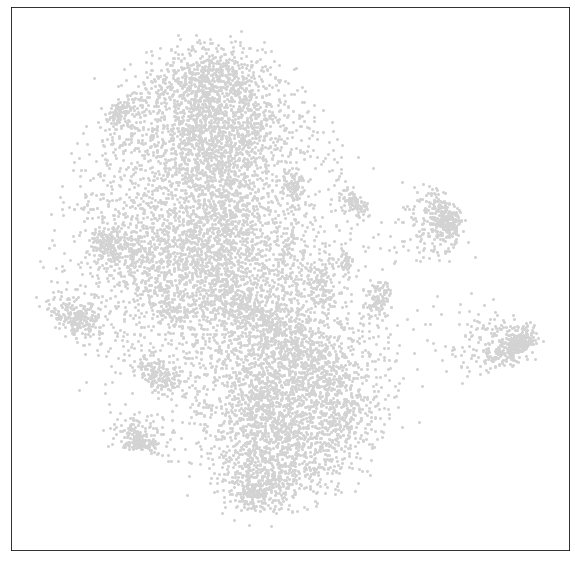

In [0]:
%matplotlib inline
plt.close('all')
fig = plt.figure()
plt.show()

visualization1(app_viz, scale= 4)

In [0]:
import pandas as pd
df = pd.read_csv('/root/.graphvite/dataset/blogcatalog/blogcatalog_label.txt', delimiter='\t', names=['id', 'label'])
df.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)
Y = np.array(df['label'])
# To check what classes are the most represented
from collections import Counter
count = Counter(Y)

<Figure size 432x288 with 0 Axes>

{}

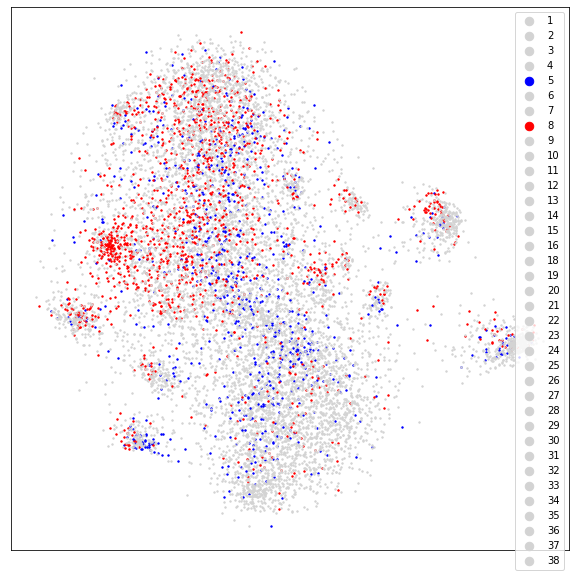

In [0]:
%matplotlib inline
plt.close('all')
fig = plt.figure()
plt.show()
visualization1(app_viz, Y= Y)

Use the node classification labels to pick two classes of nodes. Color these nodes in the plot.

**Hint**: For those belonging to both classes, you can randomly assign it to one class, or use a third color to denote them.

Are the node embeddings learned from BlogCatalog good? Why or why not?

**Answer:**
They are not good because the clusters are not well aligned with the labels. Besides, as we can see, nodes from class 8 or class 5 are dispersed through the graph so the clustering does not work well.  

## 2. Graph Convolutional Networks (50 points)

For this part, we are going to implement the GCN model for node classification, where the Cora dataset is used for testing the model. 

The Cora dataset is avaible [here](https://drive.google.com/open?id=1wVguWcuHEfga09XgLPvC_PkRXTGEEInW). You could find several files there. Among those files, net.txt provides the edges between different nodes, and the three columns correspond to source nodes, target nodes and edge weights respectively. For feature.txt, it gives the features of nodes. For label.txt, it provides the node labels. train.txt, valid.txt, test.txt provide the training nodes, validation nodes and test nodes respectively.

The goal is to train a model on the training nodes, and further apply the model for classifying test nodes. In this process, you may use the validation nodes for hyper-parameter tuning and early stopping.

### 1) Implement the GCN model

In the first step, please implement a GCN model in the following code block.

In [0]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]

import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 348 kB 6.5 MB/s 
     |████████████████████████████████| 10.0 MB 47.5 MB/s 
     |████████████████████████████████| 1.6 MB 44.3 MB/s 
     |████████████████████████████████| 24.2 MB 1.3 MB/s 
     |████████████████████████████████| 421.8 MB 25 kB/s 
     |████████████████████████████████| 7.1 MB 34.0 MB/s 
     |████████████████████████████████| 3.6 MB 34.0 MB/s 
     |████████████████████████████████| 231 kB 49.3 MB/s 
     |████████████████████████████████| 215 kB 54.0 MB/s 
     |████████████████████████████████| 509 kB 38.6 MB/s 
     |████████████████████████████████| 105 kB 40.5 MB/s 
     |████████████████████████████████| 104 kB 50.0 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 41 kB 722 kB/s 
     |████████████████████████████████| 1.3 MB 36.8 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 448 kB 39.6 MB/s 
     |██████████████

2020-04-20 14:20:41.546198: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1


In [0]:
# TODO: Implement GCN here
dataset = sg.datasets.Cora() #Download the Cora dataset from the StellarGraph library
G, node_subjects = dataset.load()

# Split the data into train, val and test sets keeping the same size than the in files provided 
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=140, test_size=None, stratify=node_subjects
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_subjects, train_size=500, test_size=None, stratify=test_subjects
)

test_subjects =test_subjects.head(1000) # Keep the first 1000 rows to respect the size of the test set

# Convert to arrays
target_encoding = preprocessing.LabelBinarizer()
train_targets = target_encoding.fit_transform(train_subjects)
val_targets = target_encoding.transform(val_subjects)
test_targets = target_encoding.transform(test_subjects)

In [0]:
# Creation of the GCN layers and the generator (to convert the core graph structure and node features into a format compatible with Keras model)

# Generator
generator = FullBatchNodeGenerator(G, method="gcn")
train_gen = generator.flow(train_subjects.index, train_targets)

# GCN Layers
gcn = GCN(
    layer_sizes=[128,128], activations=["relu","relu"], generator=generator, dropout=0.5
)

x_inp, x_out = gcn.in_out_tensors()
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

val_gen = generator.flow(val_subjects.index, val_targets)

from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)



Using GCN (local pooling) filters...


2020-04-20 14:20:50.294746: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-20 14:20:50.302376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-04-20 14:20:50.303169: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-04-20 14:20:50.303217: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-04-20 14:20:50.303357: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-04-20 14:20:50.303406: I tensorflow/stream_executor/plat

In [0]:
# Training the model on the validation set for hyper-parameter tuning and early stopping
history = model.fit(
    train_gen,
    epochs=200,
    validation_data=val_gen,
    verbose=2,
    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
    callbacks=[es_callback],
)

Epoch 1/200
1/1 - 0s - loss: 1.9601 - acc: 0.1500 - val_loss: 1.8014 - val_acc: 0.3760
Epoch 2/200
1/1 - 0s - loss: 1.7647 - acc: 0.4643 - val_loss: 1.6328 - val_acc: 0.3140
Epoch 3/200
1/1 - 0s - loss: 1.5566 - acc: 0.3500 - val_loss: 1.4453 - val_acc: 0.4580
Epoch 4/200
1/1 - 0s - loss: 1.2718 - acc: 0.5000 - val_loss: 1.1811 - val_acc: 0.6980
Epoch 5/200
1/1 - 0s - loss: 0.9545 - acc: 0.8000 - val_loss: 0.9721 - val_acc: 0.7180
Epoch 6/200
1/1 - 0s - loss: 0.7002 - acc: 0.7929 - val_loss: 0.8034 - val_acc: 0.7300
Epoch 7/200
1/1 - 0s - loss: 0.4769 - acc: 0.8500 - val_loss: 0.7087 - val_acc: 0.7560
Epoch 8/200
1/1 - 0s - loss: 0.3156 - acc: 0.9143 - val_loss: 0.6235 - val_acc: 0.7900
Epoch 9/200
1/1 - 0s - loss: 0.1996 - acc: 0.9714 - val_loss: 0.5912 - val_acc: 0.8160
Epoch 10/200
1/1 - 0s - loss: 0.1305 - acc: 0.9929 - val_loss: 0.6159 - val_acc: 0.8100
Epoch 11/200
1/1 - 0s - loss: 0.0993 - acc: 0.9714 - val_loss: 0.6654 - val_acc: 0.8040
Epoch 12/200
1/1 - 0s - loss: 0.0405 - ac

In [0]:
# Training the model on the test set
test_gen = generator.flow(test_subjects.index, test_targets)
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 1ms/step - loss: 0.7315 - acc: 0.7680

Test Set Metrics:
	loss: 0.7315
	acc: 0.7680


### 2) Performance w.r.t. the number of layers

Most GNN models only use a few layers for information propagation. Otherwise, they may suffer from the over-smoothing problem. To look into that, please fill in the following table to show the performance of your GNN model with respect to the number of propagation layers.

|               | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10|
|---------------|---|---|---|---|---|---|---|---|---|---|
| Test Accuracy | 0.758 |  0.781 |  0.779 |  0.768 | 0.737  |  0.727 | 0.583 |  0.515 |  0.571 |  0.607 |



Given the above result, please write down your observation and the potential reason based on your understanding.

**Observations:** GNN models work better with a few layers, for instance maximum 6 layers. The more we increase the number of layers, the less is the accuracy and the accuracy drops with more than 6 layers. 

**Reasons:** The main reason could be the fact that the receptive field of a single node grows exponentially with respect to the number of layers, so computing gradient for a single node costs a lot so there might be a problem of vanishing gradient. Besides, the decrease in accuracy is caused by the over-smoothing problem (the problem that the representations of nodes among different classes's nodes are similar) due to a possible over-mixing of information and noise. Multiplying layers seems to make the graph representation smoothing.

### 3) Performance w.r.t. the hidden dimension

Another important hyperparameter for graph neural networks is the dimension of hidden layers. In this part, you need to try different dimensions for the hidden layers, and further fill in the table below.

|               | 4 | 8 | 16| 32| 64|128|
|---------------|---|---|---|---|---|---|
| Test Accuracy |  0.732 | 0.749  |  0.798 | 0.802  |  0.807 | 0.817 |



Given the above result, please write down your observation and the potential reason based on your understanding.

**Observations:** The accuracy increases with the dimensions of hidden layers. We have kept the same number of layers (2 layers).

**Reasons:** The more we increase the dimension of hidden layers, the better we can detect different types of information so the better is the accuracy.